In [3]:
# IMPORTS ET CONFIGURATION
# ============================================


import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import os
from datetime import datetime


print("✅ Bibliothèques importées")
print(f"📅 Date : {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")


# ==============================================================================
# CONFIGURATION PLOTLY
# ==============================================================================


# Thème sombre
pio.templates.default = "plotly_dark"


# Palette de couleurs cohérente avec le site
COLOR_SCALE = [
   '#E50914',  # Rouge cinéma
   '#D4AF37',  # Or
   '#00C853',  # Vert
   '#1E88E5',  # Bleu
   '#9C27B0',  # Violet
]


# Configuration globale des graphiques (boutons, export, etc.)
config = {
   'displayModeBar': True,
   'displaylogo': False,
   'modeBarButtonsToRemove': ['lasso2d', 'select2d'],
   'toImageButtonOptions': {
       'format': 'png',
       'filename': 'movie_analysis',
       'height': 1080,
       'width': 1920,
       'scale': 2
   }
}


print("✅ Plotly configuré en mode dark")


# ==============================================================================
# CHARGEMENT DES DONNÉES
# ==============================================================================


df = pd.read_csv('../data/processed/movies_clean.csv')


# Créer le dossier outputs si nécessaire
os.makedirs('../outputs/figures', exist_ok=True)


print(f"\n📊 Dataset chargé : {len(df):,} films")
print(f"📅 Période : {int(df['release_year'].min())} - {int(df['release_year'].max())}")
print(f"💰 Montants ajustés inflation 2024")
print(f"\n✅ Prêt pour créer 3 visualisations interactives !")


✅ Bibliothèques importées
📅 Date : 2026-01-19 14:28:32
✅ Plotly configuré en mode dark

📊 Dataset chargé : 7,632 films
📅 Période : 1980 - 2023
💰 Montants ajustés inflation 2024

✅ Prêt pour créer 3 visualisations interactives !



GRAPHIQUE 1 : SCATTER BUDGET VS REVENUE (INTERACTIF)
📊 Films avant filtrage : 7,632
⚠️  Films avec budget=0 ou revenue=0 : 0
   - Budget=0 : 0
   - Revenue=0 : 0
✅ Films après filtrage : 7,632

📊 Statistiques Budget (M$):
   Min: 0.00
   Max: 462.4
   Médiane: 23.7

📊 Statistiques Revenue (M$):
   Min: 0.00
   Max: 3984.9
   Médiane: 34.8

📐 Utilisation d'une échelle logarithmique


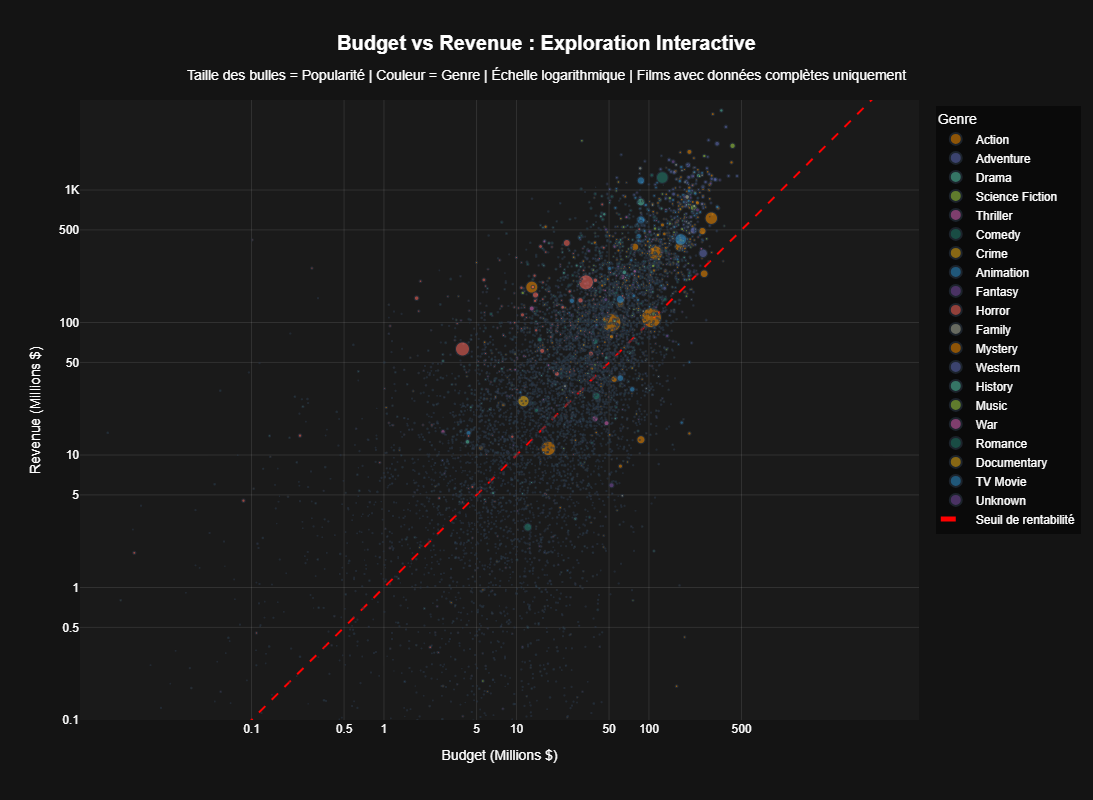


💾 Sauvegardé : interactive_scatter_budget_revenue.html
✅ Graphique 1 terminé


In [11]:
print("\n" + "="*80)
print("GRAPHIQUE 1 : SCATTER BUDGET VS REVENUE (INTERACTIF)")
print("="*80)

# Préparer les données pour le scatter
df_scatter = df.copy()

# CORRECTION 1 : Filtrer les films avec budget et revenue = 0
print(f"📊 Films avant filtrage : {len(df_scatter):,}")
films_zero = df_scatter[(df_scatter['budget_million'] == 0) | (df_scatter['revenue_million'] == 0)]
print(f"⚠️  Films avec budget=0 ou revenue=0 : {len(films_zero):,}")
print(f"   - Budget=0 : {(df_scatter['budget_million'] == 0).sum()}")
print(f"   - Revenue=0 : {(df_scatter['revenue_million'] == 0).sum()}")

# Filtrer pour garder seulement les films avec des données valides
df_scatter = df_scatter[
    (df_scatter['budget_million'] > 0) & 
    (df_scatter['revenue_million'] > 0)
].copy()

print(f"✅ Films après filtrage : {len(df_scatter):,}")

# Ajouter une colonne pour la taille des bulles (basée sur popularité)
df_scatter['bubble_size'] = df_scatter['popularity'] / 2

# Texte au survol personnalisé
df_scatter['hover_text'] = (
    '<b>' + df_scatter['title'] + '</b><br>' +
    '<br>📅 ' + df_scatter['release_year'].astype(str) +
    '<br>🎭 ' + df_scatter['main_genre'] +
    '<br>🌍 ' + df_scatter['main_country'] +
    '<br><br>💰 Budget: $' + df_scatter['budget_million'].round(1).astype(str) + 'M' +
    '<br>💵 Revenue: $' + df_scatter['revenue_million'].round(1).astype(str) + 'M' +
    '<br>📈 ROI: ' + df_scatter['roi'].round(2).astype(str) +
    '<br>⭐ Note: ' + df_scatter['vote_average'].round(1).astype(str) + '/10' +
    '<br>👥 Votes: ' + df_scatter['vote_count'].astype(str)
)

# Analyser la distribution des données
print(f"\n📊 Statistiques Budget (M$):")
print(f"   Min: {df_scatter['budget_million'].min():.2f}")
print(f"   Max: {df_scatter['budget_million'].max():.1f}")
print(f"   Médiane: {df_scatter['budget_million'].median():.1f}")

print(f"\n📊 Statistiques Revenue (M$):")
print(f"   Min: {df_scatter['revenue_million'].min():.2f}")
print(f"   Max: {df_scatter['revenue_million'].max():.1f}")
print(f"   Médiane: {df_scatter['revenue_million'].median():.1f}")

# Créer le scatter plot interactif
fig1 = px.scatter(
    df_scatter,
    x='budget_million',
    y='revenue_million',
    color='main_genre',
    size='bubble_size',
    hover_data={'hover_text': True, 'budget_million': False, 'revenue_million': False, 
                'main_genre': False, 'bubble_size': False},
    custom_data=['hover_text'],
    title='<b>Budget vs Revenue : Exploration Interactive</b><br><sub>Taille des bulles = Popularité | Couleur = Genre | Échelle logarithmique | Films avec données complètes uniquement</sub>',
    labels={
        'budget_million': 'Budget (Millions $)',
        'revenue_million': 'Revenue (Millions $)',
        'main_genre': 'Genre'
    },
    color_discrete_sequence=px.colors.qualitative.Vivid,
    opacity=0.6,
    height=800
)

# Personnaliser le hover template
fig1.update_traces(
    hovertemplate='%{customdata[0]}<extra></extra>'
)

# Calculer les limites pour la ligne de rentabilité
min_val = min(df_scatter['budget_million'].min(), df_scatter['revenue_million'].min())
max_val = max(df_scatter['budget_million'].max(), df_scatter['revenue_million'].max())

# CORRECTION : Étendre la ligne de rentabilité pour couvrir toute l'échelle visible
# En échelle log, on commence vraiment bas (0.01) pour que la ligne traverse tout le graphique
log_min = 0.01  # Commence très bas pour couvrir toute la diagonale
log_max = max_val * 2  # Étend au-delà des données pour couvrir tout le graphique

# Ajouter une ligne de seuil de rentabilité (y = x)
fig1.add_trace(
    go.Scatter(
        x=[log_min, log_max],
        y=[log_min, log_max],
        mode='lines',
        name='Seuil de rentabilité',
        line=dict(color='red', width=2, dash='dash'),
        hovertemplate='Seuil : Revenue = Budget<extra></extra>',
        showlegend=True
    )
)
print("\n📐 Utilisation d'une échelle logarithmique")

# CORRECTION 2 : Définir des ticks logarithmiques personnalisés pour plus de granularité
import numpy as np

# Créer des ticks à 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000
tickvals = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
ticktext = ['0.1', '0.5', '1', '5', '10', '50', '100', '500', '1K', '5K', '10K']

# Filtrer pour garder seulement les valeurs pertinentes selon les données
budget_max = df_scatter['budget_million'].max()
revenue_max = df_scatter['revenue_million'].max()

tickvals_budget = [t for t in tickvals if t <= budget_max * 2]
ticktext_budget = [ticktext[i] for i, t in enumerate(tickvals) if t <= budget_max * 2]

tickvals_revenue = [t for t in tickvals if t <= revenue_max * 2]
ticktext_revenue = [ticktext[i] for i, t in enumerate(tickvals) if t <= revenue_max * 2]

# Mise en page améliorée
fig1.update_layout(
    template='plotly_dark',
    plot_bgcolor='#1a1a1a',
    paper_bgcolor='#141414',
    font=dict(family='Arial, sans-serif', size=12, color='white'),
    title_font_size=20,
    title_x=0.5,
    xaxis=dict(
        type="log",
        showgrid=True,
        gridcolor='rgba(255,255,255,0.1)',
        zeroline=False,
        # Ticks personnalisés
        tickmode='array',
        tickvals=tickvals_budget,
        ticktext=ticktext_budget,
        # Range pour éliminer l'espace vide
        range=[np.log10(max(0.1, df_scatter['budget_million'].min() * 0.8)), 
               np.log10(df_scatter['budget_million'].max() * 1.2)],
        scaleanchor="y",
        scaleratio=1,
    ),
    yaxis=dict(
        type="log",
        showgrid=True,
        gridcolor='rgba(255,255,255,0.1)',
        zeroline=False,
        # Ticks personnalisés
        tickmode='array',
        tickvals=tickvals_revenue,
        ticktext=ticktext_revenue,
        # Range pour éliminer l'espace vide
        range=[np.log10(max(0.1, df_scatter['revenue_million'].min() * 0.8)), 
               np.log10(df_scatter['revenue_million'].max() * 1.2)],
    ),
    legend=dict(
        orientation='v',
        yanchor='top',
        y=0.99,
        xanchor='left',
        x=1.02,
        bgcolor='rgba(0,0,0,0.5)'
    ),
    hovermode='closest',
    width=900,
    height=800
)

# Afficher
fig1.show(config=config)

# Sauvegarder en HTML
fig1.write_html(
    '../outputs/figures/interactive_scatter_budget_revenue.html',
    config=config
)
print("\n💾 Sauvegardé : interactive_scatter_budget_revenue.html")
print("✅ Graphique 1 terminé")

# BONUS : Afficher quelques exemples de films filtrés
if len(films_zero) > 0:
    print("\n📋 Exemples de films exclus (données manquantes):")
    sample = films_zero.head(5)[['title', 'budget_million', 'revenue_million', 'roi']]
    for idx, row in sample.iterrows():
        print(f"   - {row['title']}: Budget=${row['budget_million']}M, Revenue=${row['revenue_million']}M, ROI={row['roi']}")

✅ Colonne genre utilisée : main_genre
✅ Genres analysés : 18
💰 Revenus totaux : 890,355 M$


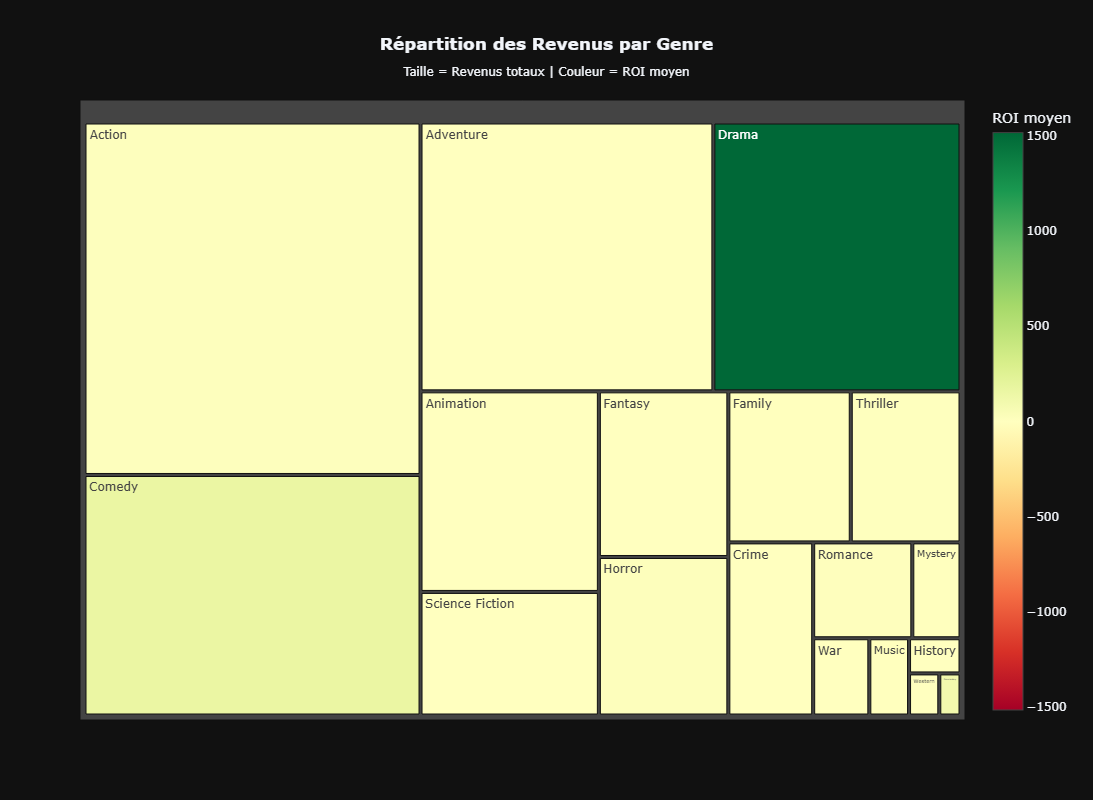

In [6]:
import json
import numpy as np
import plotly.graph_objects as go
import os

# -----------------------------
# Détection de la colonne genre
# -----------------------------
if 'genre' in df.columns:
    genre_col = 'genre'
elif 'main_genre' in df.columns:
    genre_col = 'main_genre'
elif 'primary_genre' in df.columns:
    genre_col = 'primary_genre'
elif 'genres' in df.columns:
    genre_col = 'genres'
else:
    raise ValueError(" Aucune colonne de genre trouvée")

print(f"✅ Colonne genre utilisée : {genre_col}")

# -----------------------------
# Extraction du genre principal
# -----------------------------
def extract_main_genre(value):
    if pd.isna(value) or value == '':
        return 'Unknown'
    if genre_col == 'genres':
        try:
            genres_list = json.loads(value)
            if len(genres_list) > 0:
                return genres_list[0]['name']
            else:
                return 'Unknown'
        except:
            return 'Unknown'
    else:
        return value

df['main_genre'] = df[genre_col].apply(extract_main_genre)

# -----------------------------
# Agrégation par genre
# -----------------------------
genre_stats = df.groupby('main_genre').agg({
    'revenue_million': 'sum',
    'roi': 'mean',
    'title': 'count'
}).reset_index()

genre_stats.columns = [
    'genre',
    'total_revenue',
    'avg_roi',
    'film_count'
]

# Filtrage
genre_stats = genre_stats[genre_stats['film_count'] >= 20]
genre_stats = genre_stats.sort_values('total_revenue', ascending=False)

print(f"✅ Genres analysés : {len(genre_stats)}")
print(f"💰 Revenus totaux : {genre_stats['total_revenue'].sum():,.0f} M$")

# -----------------------------
# Treemap
# -----------------------------
fig = go.Figure(go.Treemap(
    labels=genre_stats['genre'],
    parents=[''] * len(genre_stats),
    values=genre_stats['total_revenue'],

    marker=dict(
        colors=genre_stats['avg_roi'],
        colorscale='RdYlGn',
        cmid=0,
        colorbar=dict(title='ROI moyen')
    ),

    customdata=np.column_stack((
        genre_stats['film_count'],
        genre_stats['avg_roi'].round(2),
        genre_stats['total_revenue'].round(0)
    )),

    hovertemplate=(
        '<b>%{label}</b><br><br>'
        '💰 Revenu total : $%{customdata[2]:,.0f} M<br>'
        '🎬 Films : %{customdata[0]}<br>'
        '📈 ROI moyen : %{customdata[1]}<br>'
        '<extra></extra>'
    )
))

fig.update_layout(
    title={
        'text': (
            '<b>Répartition des Revenus par Genre</b><br>'
            '<sub>Taille = Revenus totaux | Couleur = ROI moyen</sub>'
        ),
        'x': 0.5
    },
    template='plotly_dark',
    height=800
)

fig.show(config=config)
